# Regulatory Architecture of all promoters in RegulonDB

In [21]:
using CSV, DataFrames, wgregseq, BioSequences, CairoMakie

wgregseq.plotting_style.default_makie!()

## Import all regulatory annotations from the database. 

Drop annotations that have no promoter annotated to it.

In [23]:
df_regulation = dropmissing(CSV.read(
    "../../data/regulonDB2023/txt/regulatory_interaction.txt", 
    DataFrame, 
    comment="#", 
    #ignorerepeated=true, 
    delim="\t",
    header=[
    "REGULATORY_INTERACTION_ID",
    "CONFORMATION_ID",
    "PROMOTER_ID",
    "SITE_ID",
    "RI_FUNCTION",
    "CENTER_POSITION",
    "RI_DIST_FIRST_GENE",
    "RI_FIRST_GENE_ID",
    "AFFINITY_EXP",
    "REGULATORY_INTERACTION_NOTE",
    "RI_INTERNAL_COMMENT",
    "KEY_ID_ORG",
    "RI_SEQUENCE",
    "RI_ORIENTATION",
    "RI_SEQUENCE_ORIENTATION",
    "REGULATORY_INTERACTION_NOTE_WEB"
    ]
), :PROMOTER_ID)

first(df_regulation, 5);

┌ Warning: thread = 1 warning: only found 10 / 16 columns around data row: 1075. Filling remaining columns with `missing`
└ @ CSV /Users/tomroeschinger/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 10 / 16 columns around data row: 1075. Filling remaining columns with `missing`
└ @ CSV /Users/tomroeschinger/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 7 / 16 columns around data row: 1076. Filling remaining columns with `missing`
└ @ CSV /Users/tomroeschinger/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 7 / 16 columns around data row: 1076. Filling remaining columns with `missing`
└ @ CSV /Users/tomroeschinger/.julia/packages/CSV/b8ebJ/src/file.jl:576


## Import promoter data.

In [24]:
df_promoter = dropmissing(CSV.read(
    "../../data/regulonDB2023/txt/promoter.txt", 
    DataFrame, 
    comment="#", 
    #ignorerepeated=true, 
    delim="\t",
    header=[
    "PROMOTER_ID",
    "PROMOTER_NAME",
    "PROMOTER_STRAND",
    "POS_1",
    "SIGMA_FACTOR",
    "BASAL_TRANS_VAL",
    "EQUILIBRIUM_CONST",
    "KINETIC_CONST",
    "STRENGTH_SEQ",
    "PROMOTER_SEQUENCE",
    "KEY_ID_ORG",
    "PROMOTER_NOTE",
    "PROMOTER_INTERNAL_COMMENT",
    "PROMOTER_NOTE_WEB"
    ]
), :PROMOTER_NAME)

first(df_promoter, 5);


┌ Warning: thread = 1 warning: only found 12 / 14 columns around data row: 1006. Filling remaining columns with `missing`
└ @ CSV /Users/tomroeschinger/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 12 / 14 columns around data row: 1006. Filling remaining columns with `missing`
└ @ CSV /Users/tomroeschinger/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 1 / 14 columns around data row: 1007. Filling remaining columns with `missing`
└ @ CSV /Users/tomroeschinger/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 1 / 14 columns around data row: 1007. Filling remaining columns with `missing`
└ @ CSV /Users/tomroeschinger/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: only found 12 / 14 columns around data row: 1006. Filling remaining columns with `missing`
└ @ CSV /Users/tomroeschinger/.julia/packages/CSV/b8ebJ/src/file.jl:576
┌ Warning: thread = 1 warning: o

In [25]:
df_c = dropmissing(CSV.read(
    "../../data/regulonDB2023/txt/conformation.txt", 
    DataFrame, 
    comment="#", 
    #ignorerepeated=true, 
    delim="\t",
    header=[
            "CONFORMATION_ID",
            "TRANSCRIPTION_FACTOR_ID",
            "FINAL_STATE",
            "CONFORMATION_NOTE",
            "INTERACTION_TYPE",
            "CONFORMATION_INTERNAL_COMMENT",
            "KEY_ID_ORG",
            "CONFORMATION_TYPE",
            "APO_HOLO_CONFORMATION",
            "CONFORMATION_NOTE_WEB",
    ]
), :CONFORMATION_ID)

first(df_c, 1)


Row,CONFORMATION_ID,TRANSCRIPTION_FACTOR_ID,FINAL_STATE,CONFORMATION_NOTE,INTERACTION_TYPE,CONFORMATION_INTERNAL_COMMENT,KEY_ID_ORG,CONFORMATION_TYPE,APO_HOLO_CONFORMATION,CONFORMATION_NOTE_WEB
,String15,String15,String,String?,String15?,Missing,String7,String15,String7?,String?
1,ECK120012025,ECK125302599,ZntR,missing,missing,missing,ECK12,Inactive,Apo,missing


### Join promoter and regulatory annotation

In [28]:
replace!(df.CONFORMATION_ID, missing => "none")

11595-element PooledArrays.PooledVector{Union{Missing, String15}, UInt32, Vector{UInt32}}:
 "ECK125269233"
 "ECK125269323"
 "ECK125269392"
 "ECK125269401"
 "ECK125269401"
 "ECK125269401"
 "ECK125269234"
 "ECK125269234"
 "ECK125269234"
 "ECK125269240"
 ⋮
 "none"
 "none"
 "none"
 "none"
 "none"
 "none"
 "none"
 "none"
 "none"

In [37]:
df = outerjoin(df_promoter, df_regulation, on=:PROMOTER_ID, makeunique=true)
replace!(df.CONFORMATION_ID, missing => "none")
df = outerjoin(df, df_c, on=:CONFORMATION_ID, makeunique=true)
dropmissing!(df, :PROMOTER_NAME);

In [39]:
CSV.write("binding_sites.txt", df)

"binding_sites.txt"

### Count regulatory binding sites

In [6]:
p = wgregseq.promoter_finder.Promoter_Calculator()

wgregseq.promoter_finder.Promoter_Calculator([0.09490738746347842, 0.028821899543931544, 0.1198230376783691, -0.34434029969128693, 0.0, 0.0, 0.0, 0.1638454358405594, 0.0, 0.0  …  0.19135161731618874, -0.2144031377586821, -0.11438766847409058, -0.015096442164621445, -0.09696411810435467, 0.11206056026872108, 0.2546979750256038, 0.6505806574328081, 0.16210794028069989, 0.009426894866260856], -0.9583584537583338, Dict{BioSequences.LongSequence{BioSequences.DNAAlphabet{4}}, Float64}(GGG => 0.0, CTT => 0.32615138291787527, TAC => -0.6955332165785065, AGG => 0.0, CTA => -0.09617404850628807, CAT => -0.2999626574312279, GCC => 0.0, GTG => 0.0, CAA => -0.18785061878221526, ACC => 0.0…), Dict{BioSequences.LongSequence{BioSequences.DNAAlphabet{4}}, Float64}(GGG => 0.0, CTT => -0.21516031962995938, TAC => 0.18558906240429637, AGG => -0.11797676076098046, CTA => 0.07217807522519586, CAT => -0.5976286243429203, GCC => 0.23599181501756106, GTG => 0.3607159076854683, CAA => 0.37084711173422535, ACC =

In [19]:
dropmissing!(df, :PROMOTER_NAME)
gdf = groupby(df, :PROMOTER_NAME)

df_sites = DataFrame()

for _df in gdf
    act = count( ==("activator"), skipmissing(_df.RI_FUNCTION))
    rep = count( ==("repressor"), skipmissing(_df.RI_FUNCTION))
    if ~ismissing(_df.PROMOTER_SEQUENCE[1])
        r = p(_df.PROMOTER_SEQUENCE[1])["Forward_Predictions_per_TSS"]
        tss = collect(keys(r))
        tx_rates = [r[x]["Tx_rate"] for x in tss]
        append!(
            df_sites, 
            DataFrame(
                name=[_df.PROMOTER_NAME[1]], 
                architecture=[(act, rep)], 
                promoter_seq=[_df.PROMOTER_SEQUENCE[1]],
                tx_rates=[tx_rates]
            )
        )
    else
        append!(
            df_sites, 
            DataFrame(
                name=[_df.PROMOTER_NAME[1]], 
                architecture=[(act, rep)], 
                promoter_seq=[""],
                tx_rates=[[0.]]
            )
        )
    end
end



In [105]:
string.(df.promoter_seq)

93-element Vector{String}:
 "TCCCACGATGAAAACACGCCACCCCTTGAAC" ⋯ 19 bytes ⋯ "CACTGAAAGAATGTAAGCGTTTACCCACTAA"
 "CTTTCGAGTGAAAATCTACCTATCTCTTTGA" ⋯ 19 bytes ⋯ "ATACAAGCCTATATAGCGAACTGCTATAGAA"
 "GAATATTCTTATAAACCTGTAAGCTGTTAAA" ⋯ 19 bytes ⋯ "ATAAATAAGCAACACATGATAAAAGCGCCCT"
 "TTAAAGCGCAATAAGTCGTTGTCTGCGGCAT" ⋯ 19 bytes ⋯ "TAATAGGCAAAGTTATTTCCATTTCTGCAAT"
 "TATCTTTTTGATTTATAAAGATCTGATTGAA" ⋯ 19 bytes ⋯ "AGGATGAGTTAGCGAATTACACTAACAAGTG"
 "CGACTAAATCAGTCAAGTAAATAGTTGACCA" ⋯ 19 bytes ⋯ "ACTTGACCCTGCTATGCAATACCCCCACTTT"
 "ATGCAAATAGTAATGAGAACGACTATCAATT" ⋯ 19 bytes ⋯ "TTATGCGCAGATTTTGTGACTTGCGTCCTGG"
 "GCTGAAAAGACATTCTCTGTTTGGTTTACAT" ⋯ 19 bytes ⋯ "ATTTCTCATTTGCATTTACAAACAAAATTAT"
 "TATTTTCGCTATGGTTATGCGTAAGCATTGC" ⋯ 19 bytes ⋯ "TATAATGAGAATTATTATCATTAAAAGATGA"
 "GGCGAATGCGAAAGAACTGCTTGCAGCGTAA" ⋯ 19 bytes ⋯ "GTCAGAGTAAACAGCAAAACGCCGTAAGACC"
 "AATAACCACACTGTGAATGTTGTCTTTAATC" ⋯ 19 bytes ⋯ "ATACCACTTTAGAGTTAGTCAGTATCTTCCT"
 "TTTTTAACTGACTTTCGTTTGAAAACTGGCG" ⋯ 19 bytes ⋯ "CAAATAAATATATAAAAAAAAC

In [107]:
pfm_dict = Dict()
for group in groupby(df_sites, :architecture)
    df = group[length.(group.promoter_seq) .== 81, :]
    pfm_dict[unique(df.architecture)[1]] = PFM(df.promoter_seq) / nrow(df)
    CSV.write("$(unique(df.architecture)[1]).txt", DataFrame(seq=df.promoter_seq))
end

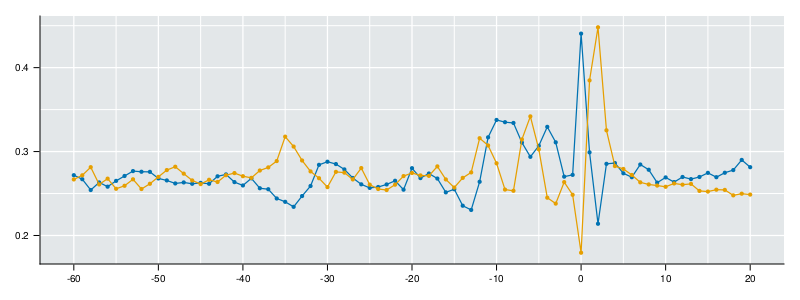

In [98]:
fig = Figure(resolution=(800, 300))
ax = Axis(fig[1, 1], xticks=-60:10:20)
scatter!(ax, -60:20, pfm_dict[(0, 0)][1, :], markersize=6)
lines!(ax, -60:20, pfm_dict[(0, 0)][1, :])
scatter!(ax, -60:20, pfm_dict[(0, 0)][4, :], markersize=6)
lines!(ax, -60:20, pfm_dict[(0, 0)][4, :])

fig

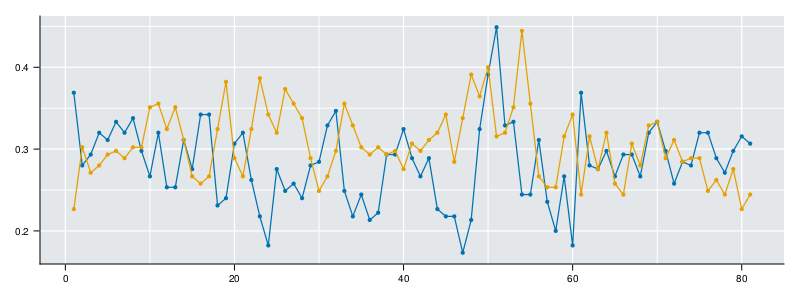

In [94]:
fig = Figure(resolution=(800, 300))
ax = Axis(fig[1, 1])
scatter!(ax, pfm_dict[(1, 0)][1, :], markersize=6)
lines!(ax, pfm_dict[(1, 0)][1, :])
scatter!(ax, pfm_dict[(1, 0)][4, :], markersize=6)
lines!(ax, pfm_dict[(1, 0)][4, :])

fig

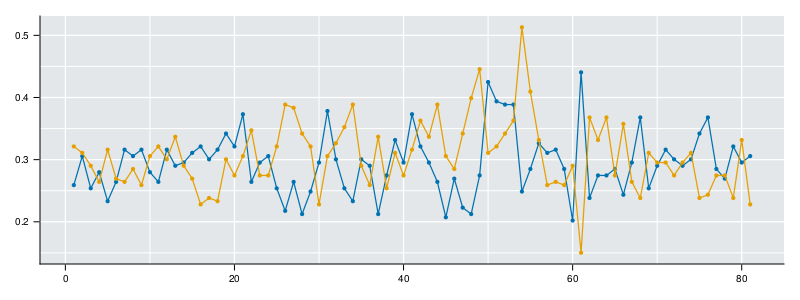

In [95]:
fig = Figure(resolution=(800, 300))
ax = Axis(fig[1, 1])
scatter!(ax, pfm_dict[(0, 1)][1, :], markersize=6)
lines!(ax, pfm_dict[(0, 1)][1, :])
scatter!(ax, pfm_dict[(0, 1)][4, :], markersize=6)
lines!(ax, pfm_dict[(0, 1)][4, :])

fig